<a href="https://colab.research.google.com/github/PhaniHarika/IIITH_internship/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YOLOv8n Segmentation on Images & Youtube Video**



**OBJECTIVE**:

Perform object segmentation using YOLOv8n on:

A list of local images.

A video downloaded from YouTube.

Then:

Extract video frames using FFmpeg.
Segment them using YOLOv8n.
Reassemble them into a segmented video.
STEP-BY-STEP PROCESS

**PHASE 1**: Environment Setup

1.1 Install Python Download from: https://www.python.org/downloads/

Run the installer

CHECK “Add Python to PATH” during setup

Verify in terminal:

python --version
1.2 Install VS Code (if not already installed) Download from: https://code.visualstudio.com Open it and install the Python extension.

1.3 How to Install FFmpeg on Windows (Step-by-Step)

Step 1: Download FFmpeg

Open your browser

Go to: 👉 https://www.gyan.dev/ffmpeg/builds/

Scroll down to the "Release builds" section

Click the link to download:

ffmpeg-release-essentials.zip
Step 2: Extract the Zip File

Locate the downloaded zip file in your Downloads folder

Right-click it → Extract All...

Extract it to:

C:\ffmpeg
After extraction, you should have a path like:

C:\ffmpeg\ffmpeg-2024-xx-xx-git-essentials\bin\
Step 3: Add FFmpeg to System PATH

This lets you run ffmpeg from anywhere in the terminal.

3.1 Open Environment Variables

Press Win + S, type Environment Variables, and open:

"Edit the system environment variables"
In the window that opens, click the Environment Variables button.

3.2 Edit the PATH Variable Under System variables, find and click on:

Path
Click Edit

In the new window, click New

Paste this (adjust version if needed):

C:\ffmpeg\ffmpeg-2024-xx-xx-git-essentials\bin
Click OK → OK → OK

!!if you are not able add to system path variable try this!!

Add FFmpeg to Your User PATH (No Admin Required)

This method works even if: You're not an administrator

You can't edit system environment variables

Step-by-Step: Add FFmpeg to User PATH

Step 1 Extract FFmpeg

Make sure you already downloaded and extracted FFmpeg (as you did before).

Extract it to:

C:\Users\YourUsername\ffmpeg\
Inside that folder, locate the bin subfolder:

C:\Users\YourUsername\ffmpeg\ffmpeg-2024-xx-xx\bin\
Step 2: Add to User PATH:

Press Win + S, search for: Environment Variables

Open: Edit environment variables for your account (NOT system)

In the User variables section (top half), select Path, then click Edit

In the window:

Click New

Paste your full bin path, for example:

C:\Users\YourUsername\ffmpeg\ffmpeg-2024-xx-xx\bin
Click OK → OK

Step 3: Confirm it Works

Close and re-open Command Prompt

Run:

ffmpeg -version
**PHASE 2**: Project Folder & Dependencies

Create Project Folder Open VS Code → File > Open Folder… → create:

D:\SegmentationProject

Open Terminal (in VS Code)

Then run:

pip install ultralytics yt-dlp opencv-python
PHASE 3: Part A — Segment Local Images

Folder Setup
In VS Code, create:

SegmentationProject/
├── images/             ← Add 2–3 .jpg images here
├── segmented_images/   ← Output will go here(will be created by script).
Create segment_images.py:
Python code:

from ultralytics import YOLO
from pathlib import Path
import shutil

model = YOLO("yolov8n-seg.pt")
input_dir = Path("images")
output_dir = Path("segmented_images")

if output_dir.exists():
shutil.rmtree(output_dir)
output_dir.mkdir(parents=True, exist_ok=True)

for i, img_path in enumerate(sorted(input_dir.glob("*.jpg")), start=1):
print(f"Segmenting: {img_path.name}")
results = model.predict(source=str(img_path), save=True, save_txt=False)
yolo_out = Path("runs/segment/predict")
output_img = next(yolo_out.glob("*.jpg"))
output_img.rename(output_dir / f"image{i:04d}.jpg")
shutil.rmtree("runs")
Run it:

python segment_images.py

Output will appear in:

segmented_images/
**PHASE 4**: Part B — Segment a YouTube Video

We will:

Download a video from YouTube

Extract frames using FFmpeg

Segment each frame using YOLOv8n

Reconstruct the segmented video

1. Download a YouTube Video

Use yt-dlp

yt-dlp -f mp4 "https://www.youtube.com/watch?v=FErxtecfYDU" -o input_video.mp4
This will download and save the video as input_video.mp4 in your SegmentationProject folder.

2. Extract Frames from Video

Create folder to store frames:

mkdir frames
Run FFmpeg to extract 1 frame per second:

ffmpeg -i input_video.mp4 -vf "fps=1" frames/frame%04d.jpg
This creates frame0001.jpg, frame0002.jpg, ... inside frames/.

3. Segment All Frames Using YOLOv8n

Create Python script:

segment_video_frames.py
Code:

from ultralytics import YOLO
from pathlib import Path
import shutil

model = YOLO("yolov8n-seg.pt")
input_dir = Path("frames")
output_dir = Path("segmented_frames")

if output_dir.exists():
shutil.rmtree(output_dir)
output_dir.mkdir(parents=True, exist_ok=True)

for i, img_path in enumerate(sorted(input_dir.glob("*.jpg")), start=1):
print(f"Segmenting: {img_path.name}")
results = model.predict(source=str(img_path), save=True, save_txt=False)
yolo_output = Path("runs/segment/predict")
output_img = next(yolo_output.glob("*.jpg"))
output_img.rename(output_dir / f"frame{i:04d}.jpg")
shutil.rmtree("runs")
Run the script in terminal:

python segment_video_frames.py
Segmented frames are saved in the segmented_frames/ folder.

4. Reconstruct the Segmented Video

Run FFmpeg to join segmented frames:

ffmpeg -framerate 1 -i segmented_frames/frame%04d.jpg -c:v libx264 -pix_fmt yuv420p output_segmented_video.mp4
This creates the final output_segmented_video.mp4 showing object-segmented traffic footage.

OUTPUT FILE STRUCTURE

SegmentationProject/
├── images/
│   └── [your input images]
├── segmented_images/
│   └── image0001.jpg ...
├── input_video.mp4
├── frames/
│   └── frame0001.jpg ...
├── segmented_frames/
│   └── frame0001.jpg ...
├── segment_images.py
├── segment_video_frames.py
├── output_segmented_video.mp4

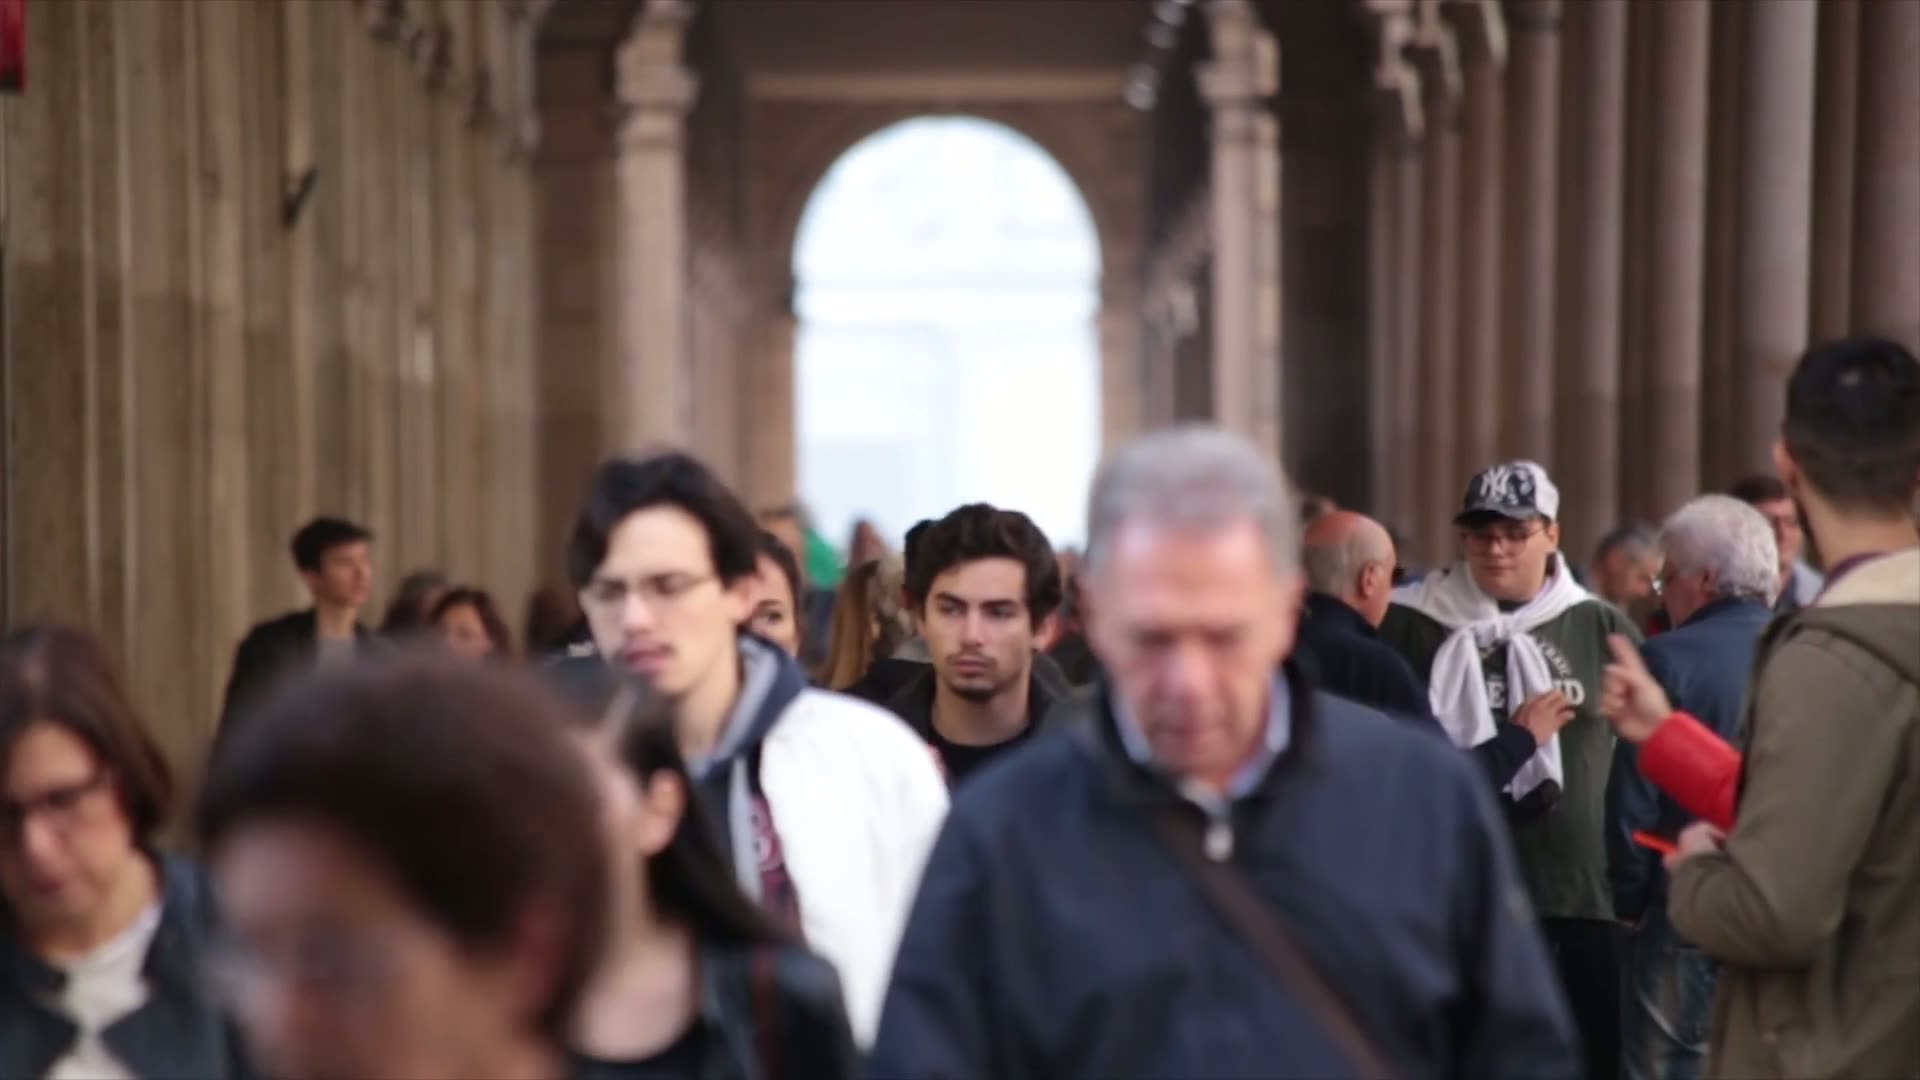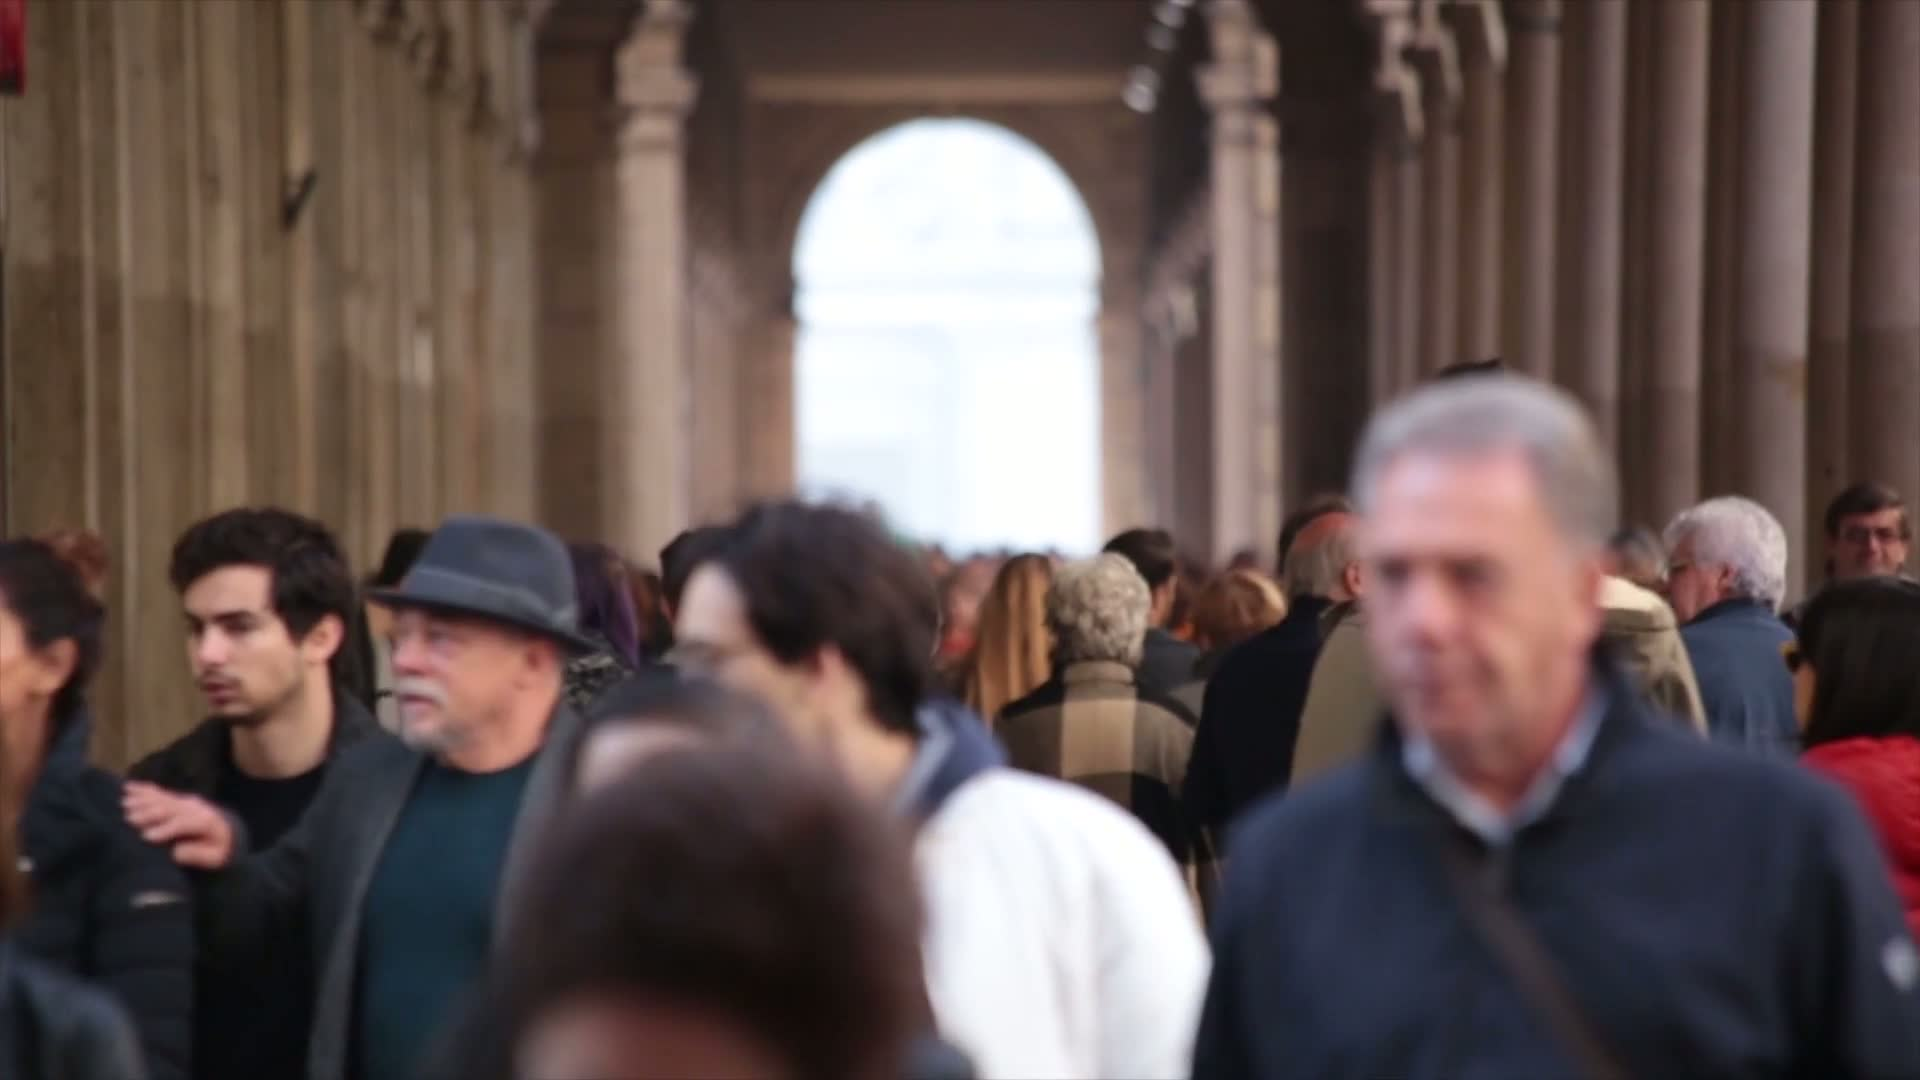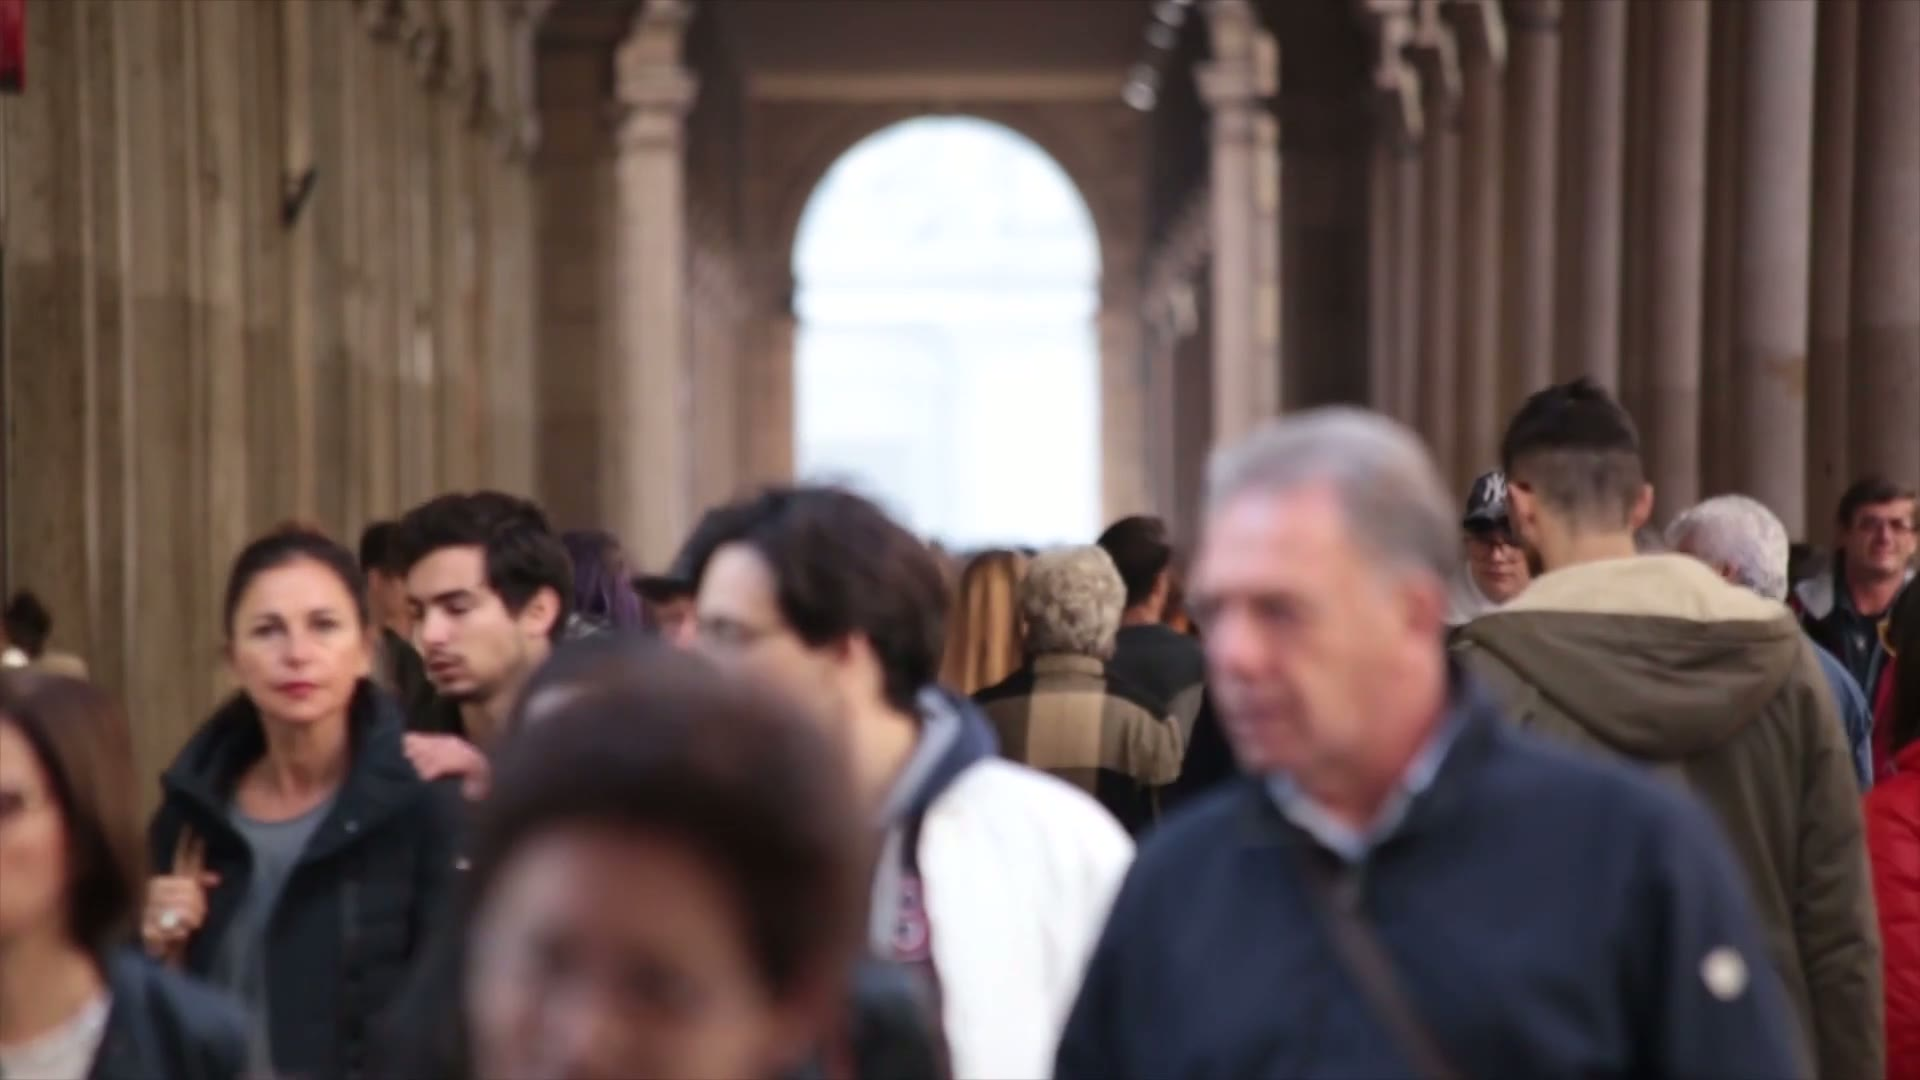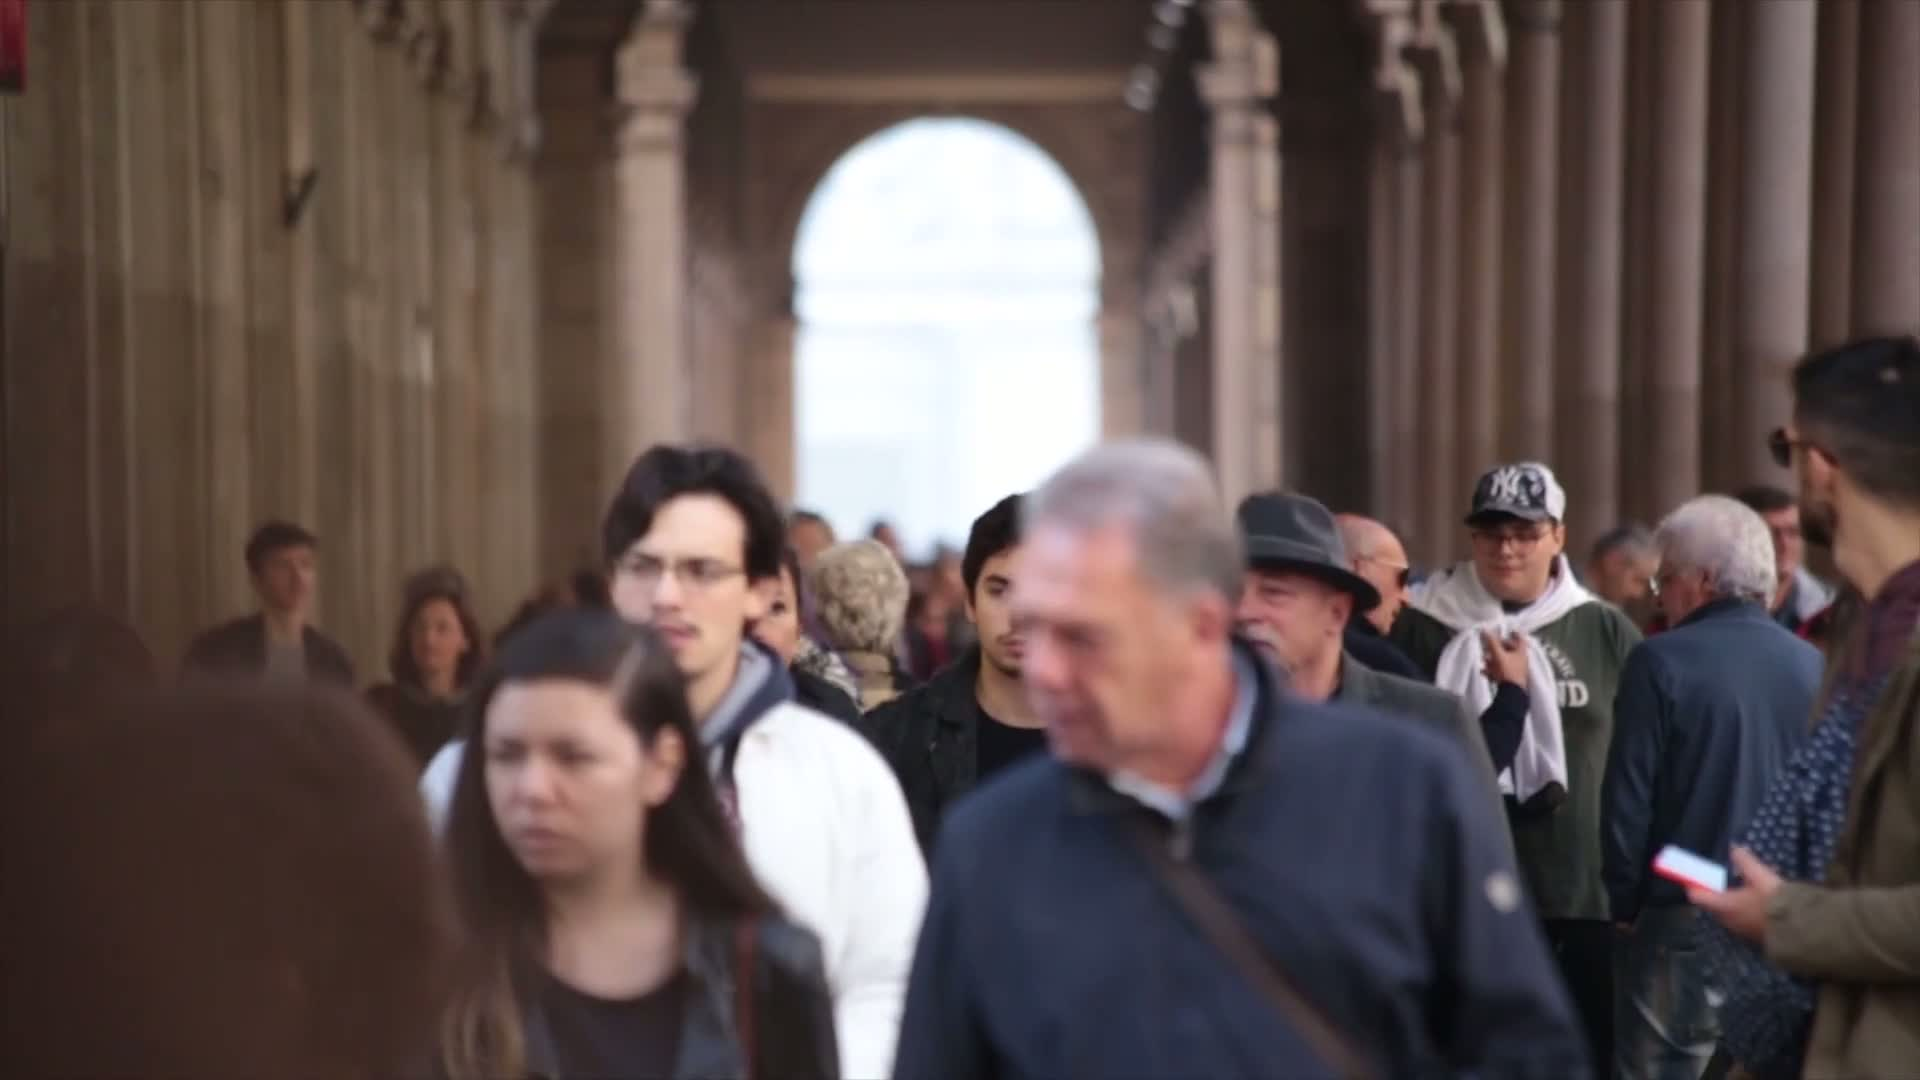

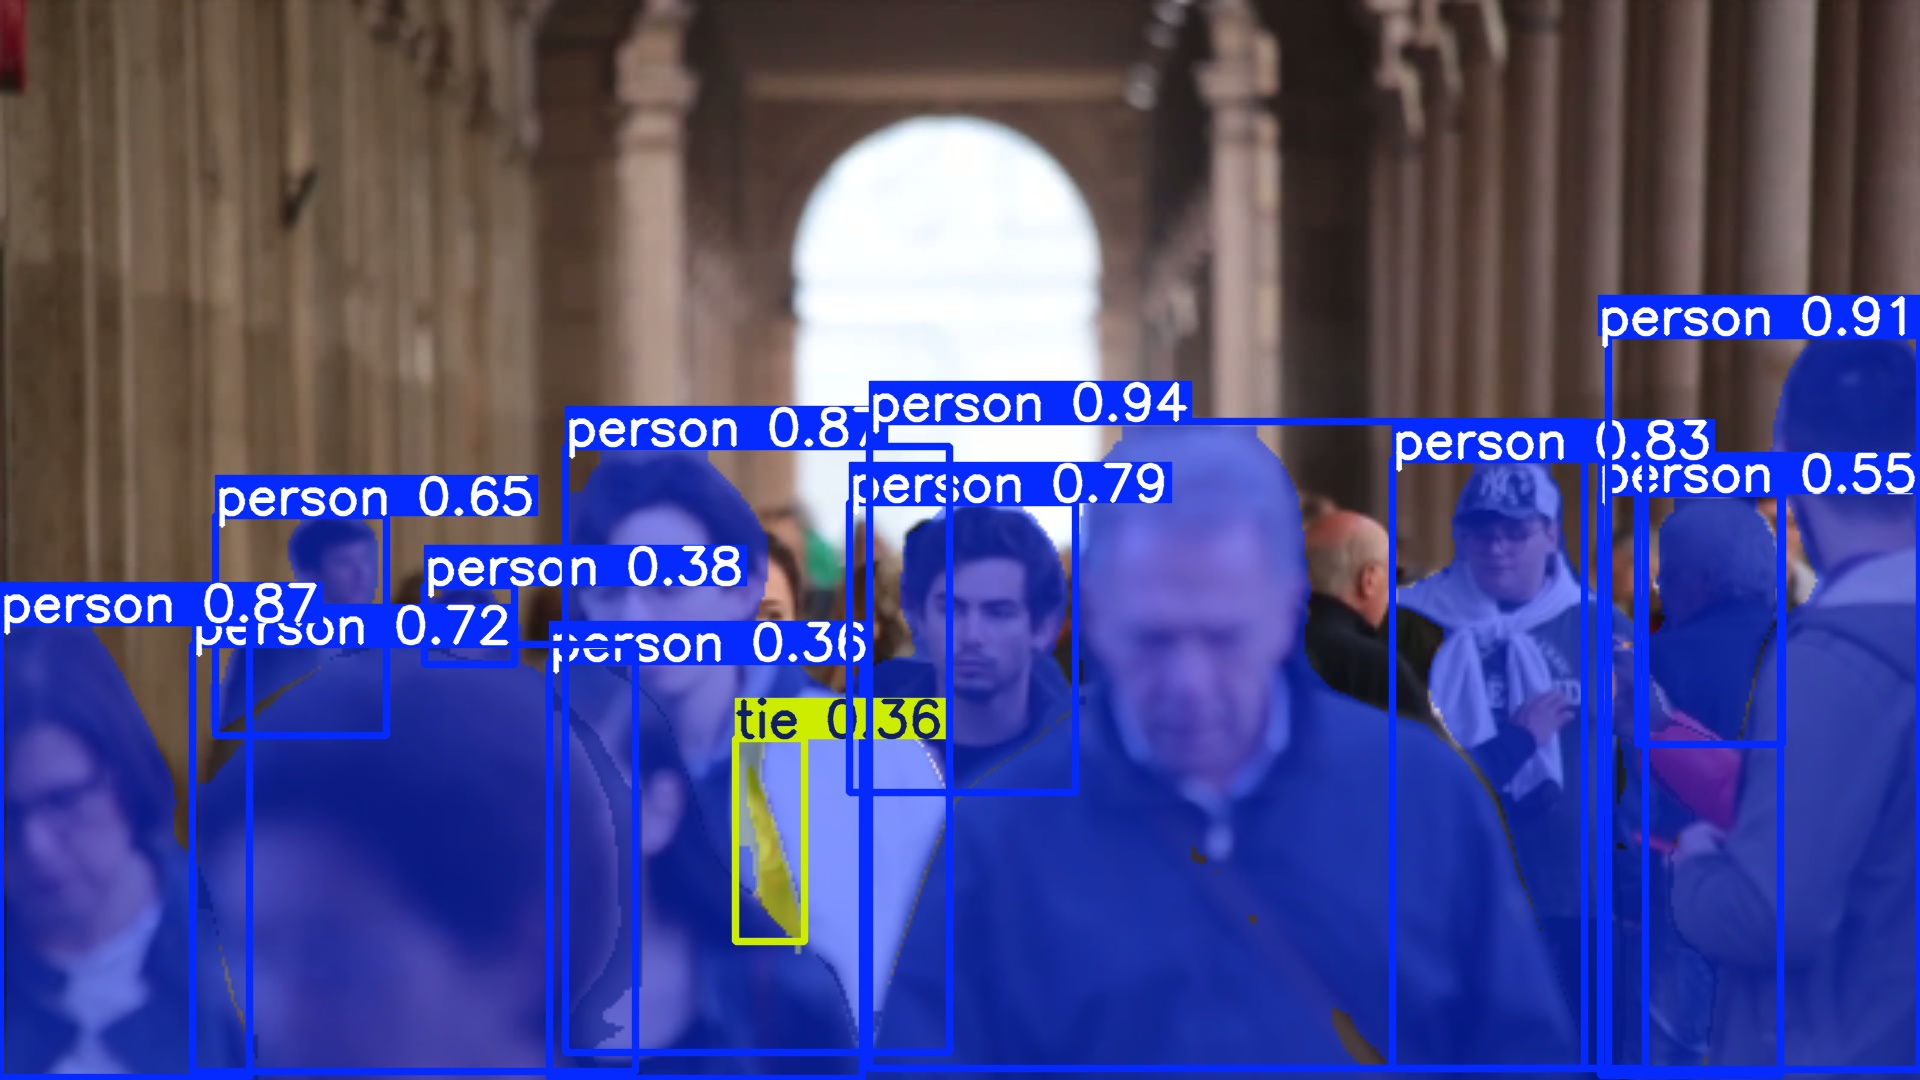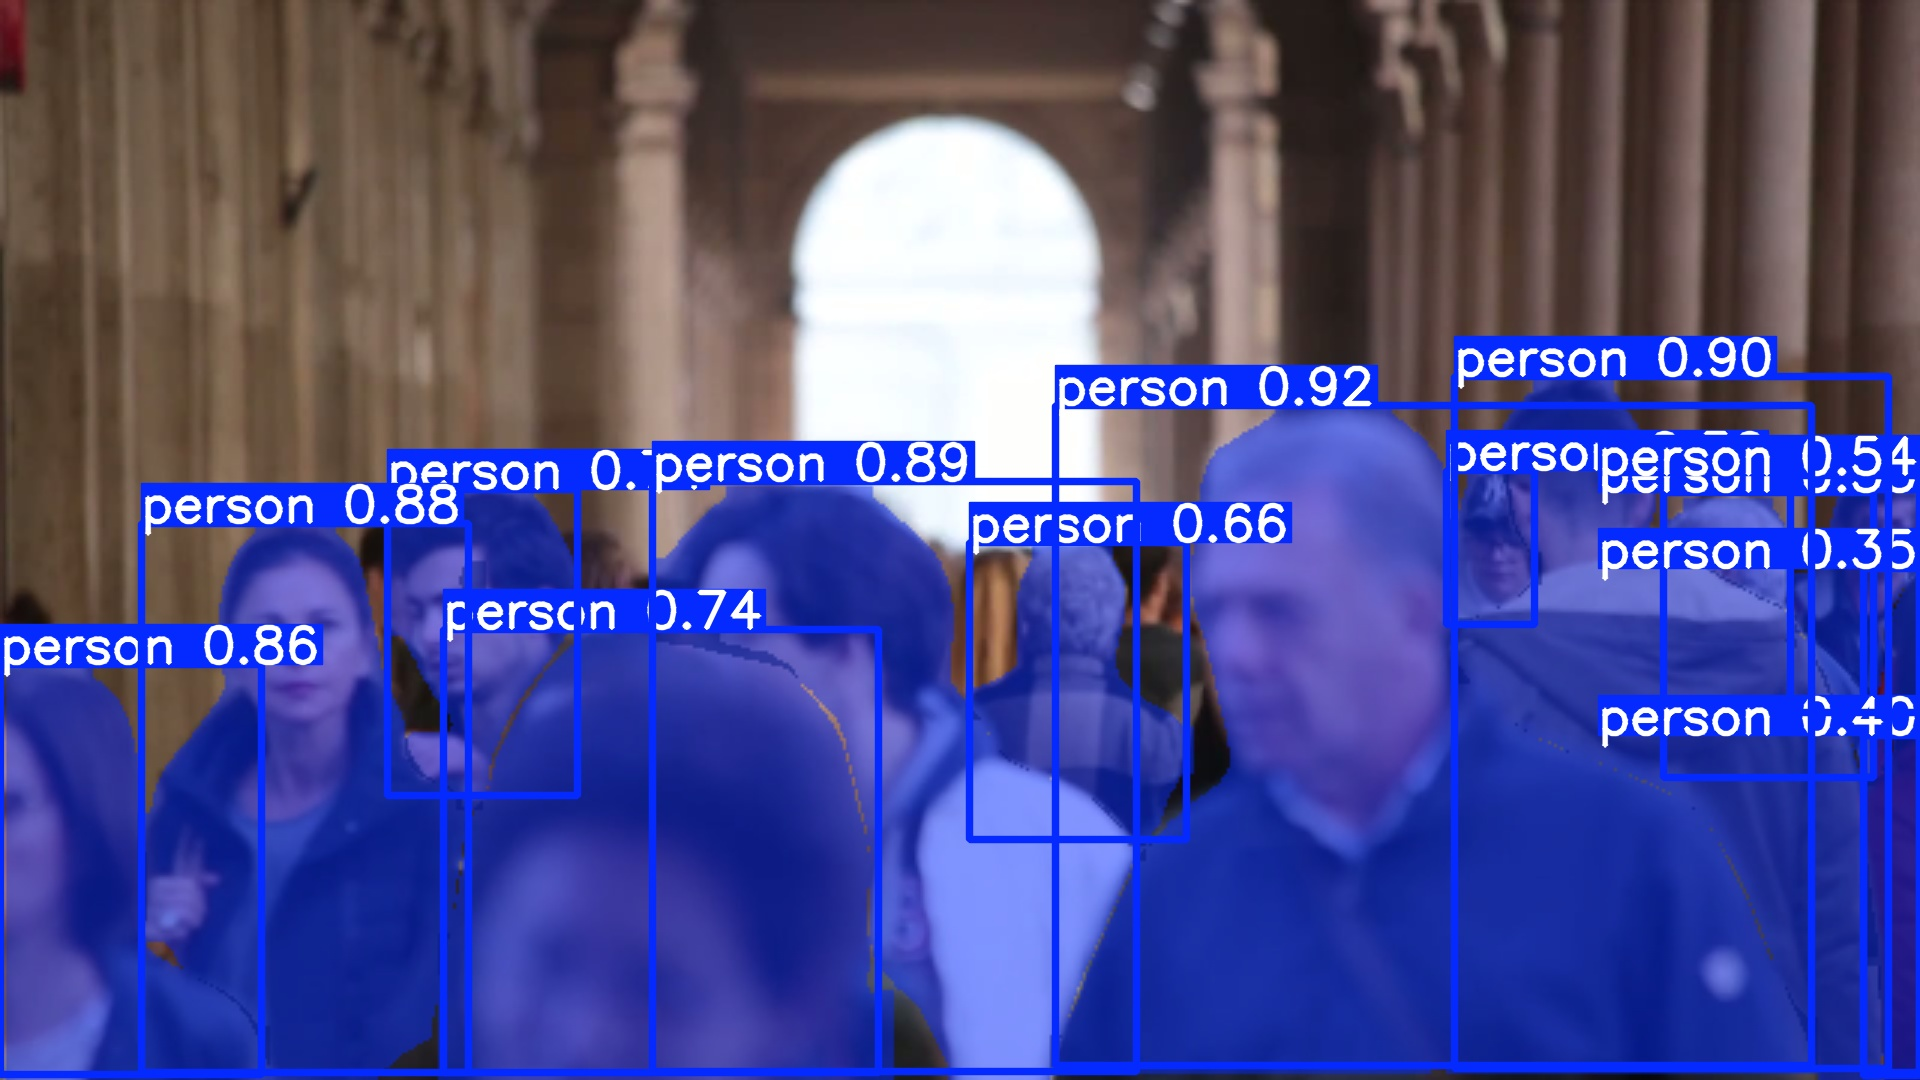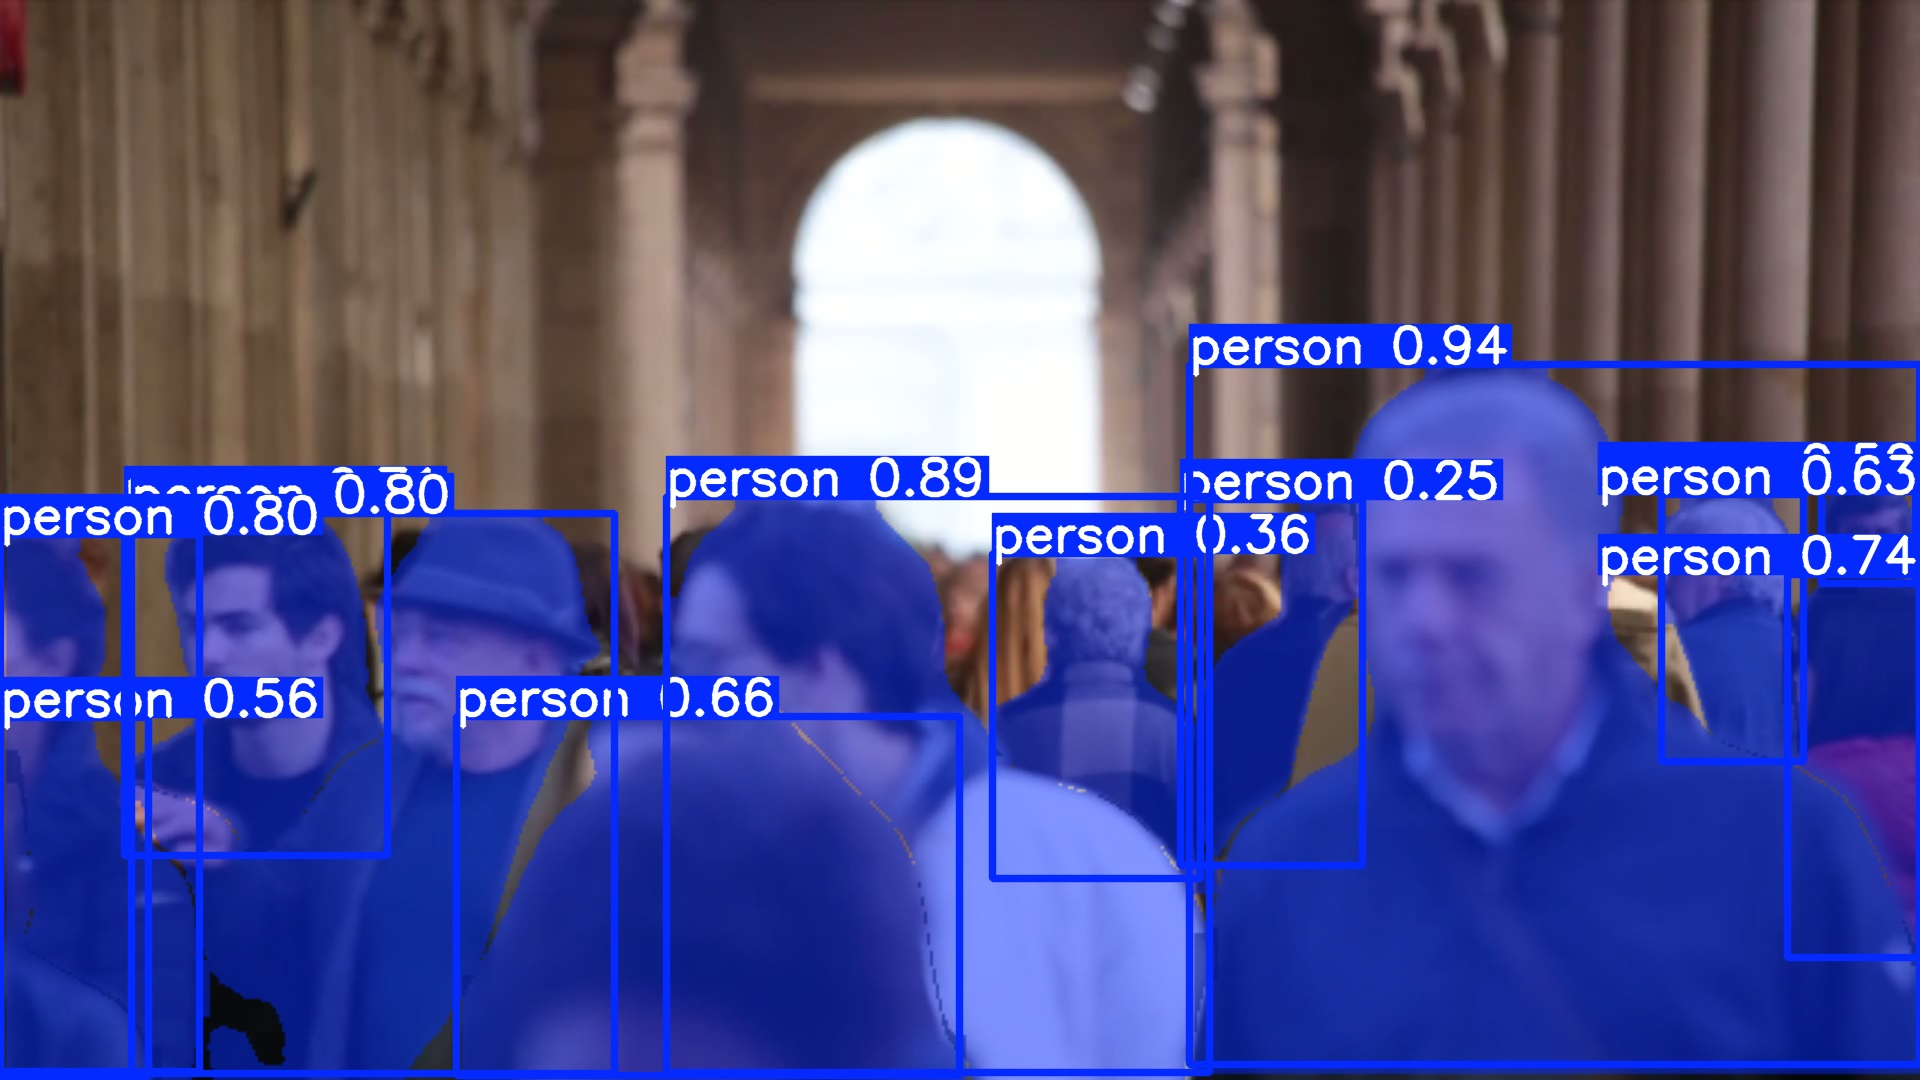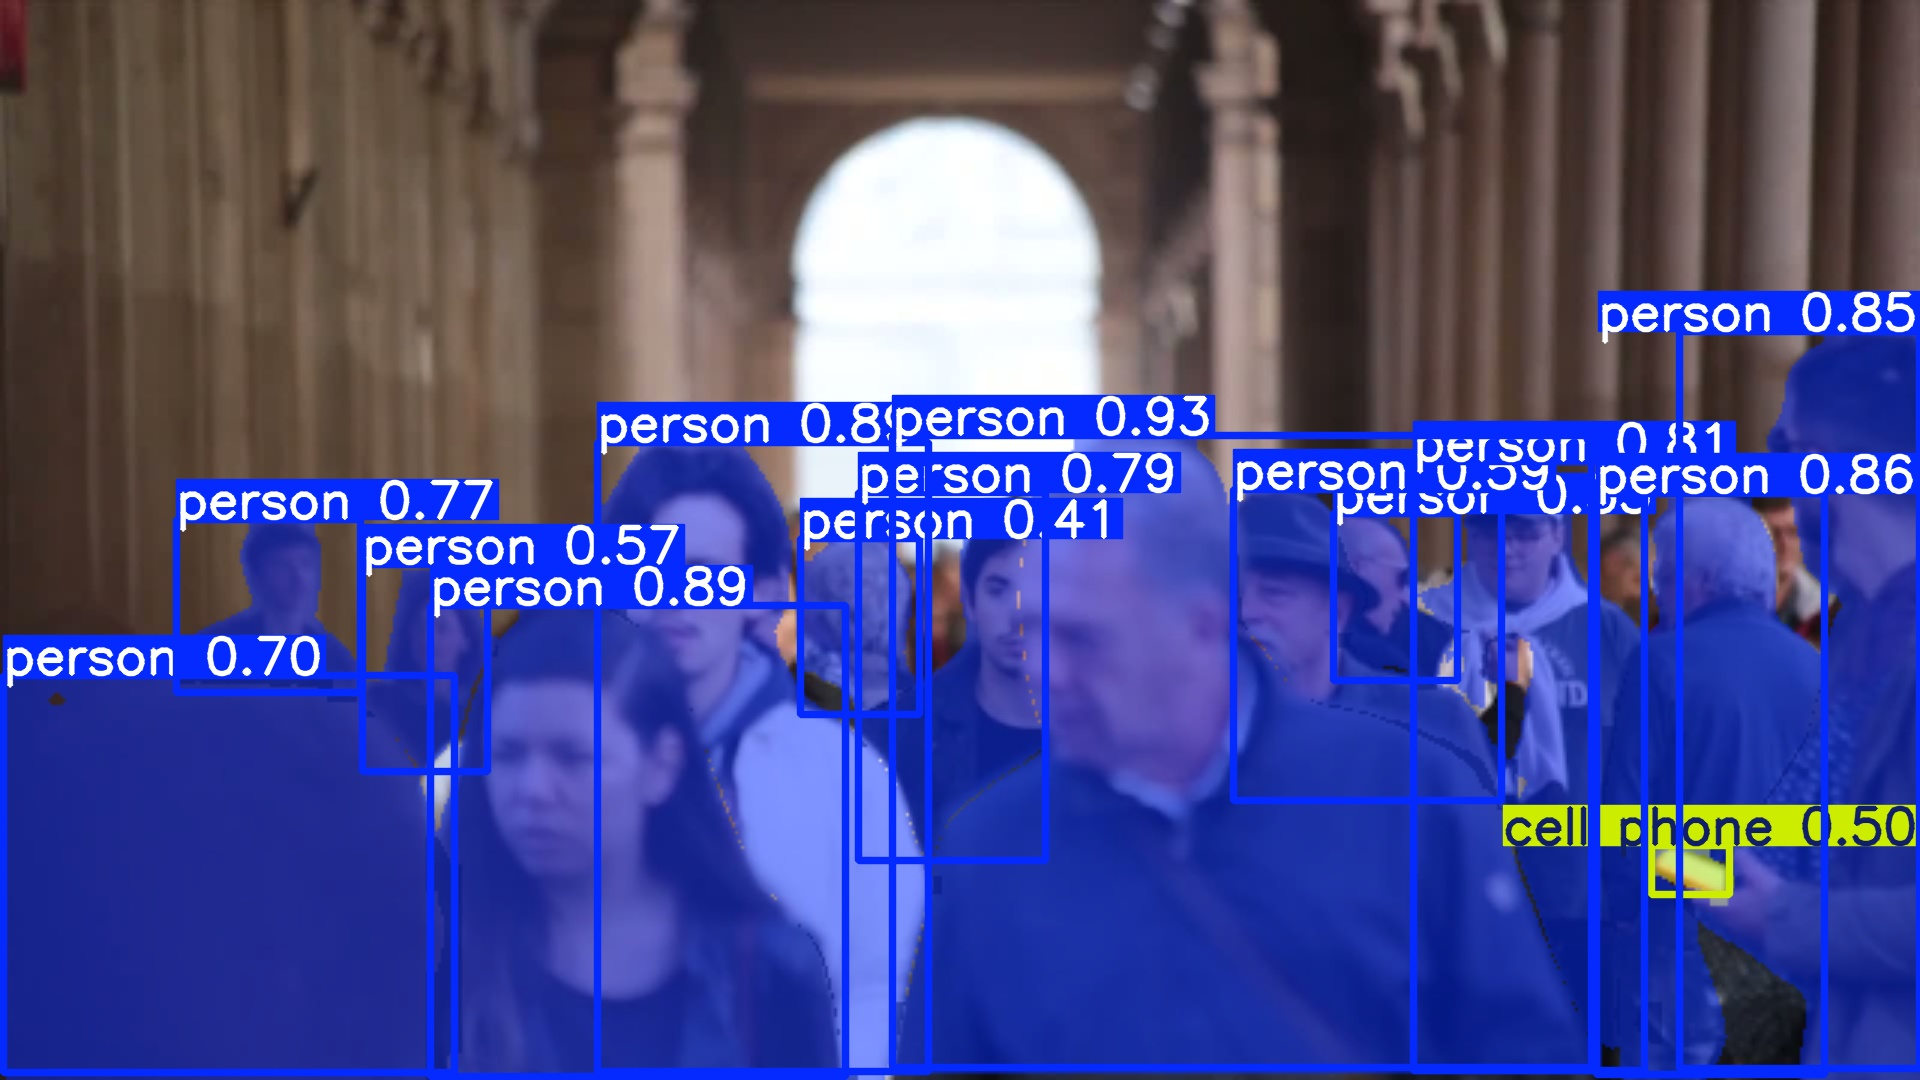